In [2]:
import pymc
import numpy as np
import pandas as pd
import xarray as xr
import copy
import matplotlib.pyplot as plt
import pygemfxns_ensemble_sampling as es
import glob
import os
import run_calibration_list_multiprocess as rc
from pandas.plotting import autocorrelation_plot
import pygemfxns_ensemble_sampling as es
import matplotlib.mlab as mlab
from jupyterthemes import jtplot
from scipy.stats import gaussian_kde
import scipy.stats as stats 

jtplot.style('grade3', fscale=1.3)
jtplot.figsize(x=18, y=10)


In [4]:
filelist = glob.glob(os.path.join('../markov_chain_databases/', '*.pickle'))
#print(filelist)
traces = {}
for f in filelist:
    samples = f[26:-20]
    name = f[-12:-7]
    #print(samples, name)
    traces[(name, samples)] = pymc.database.pickle.load(f)

/home/tushar/anaconda3/envs/pymc/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


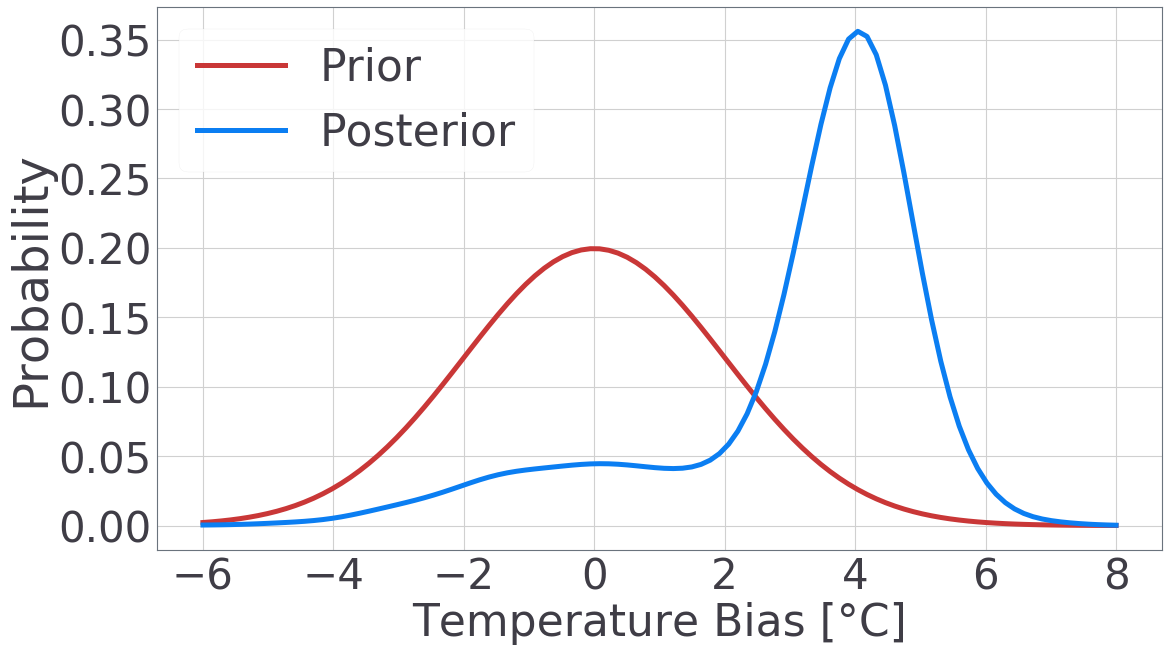

../probability_plots/10075tempchange.png


/home/tushar/anaconda3/envs/pymc/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


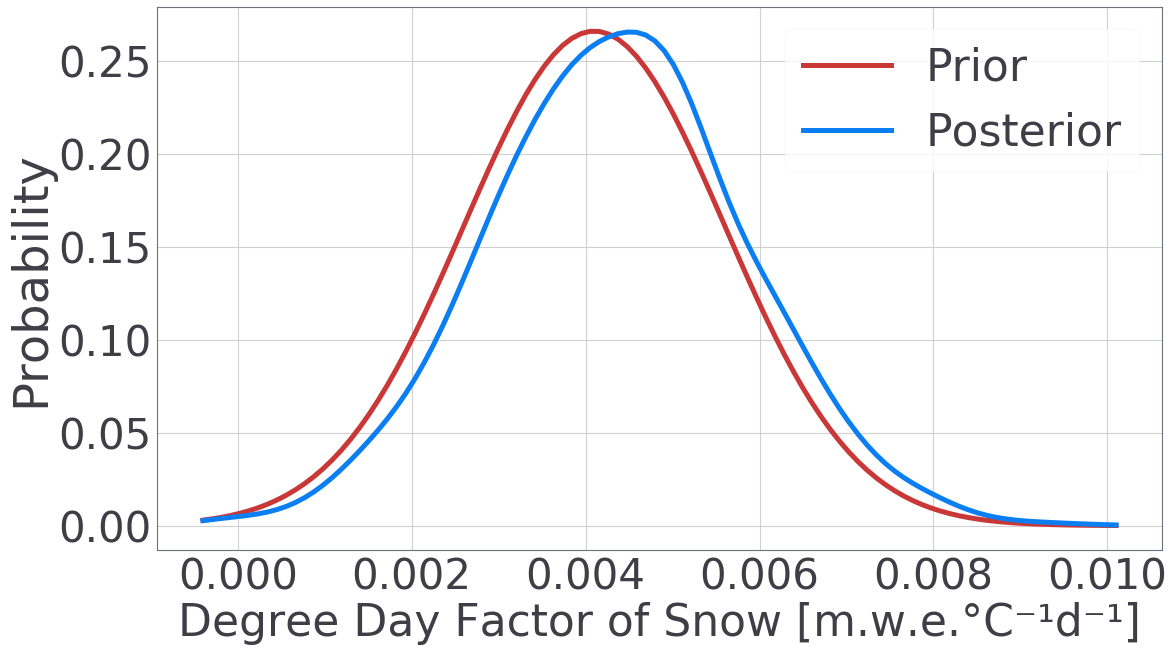

../probability_plots/10075ddfsnow.png


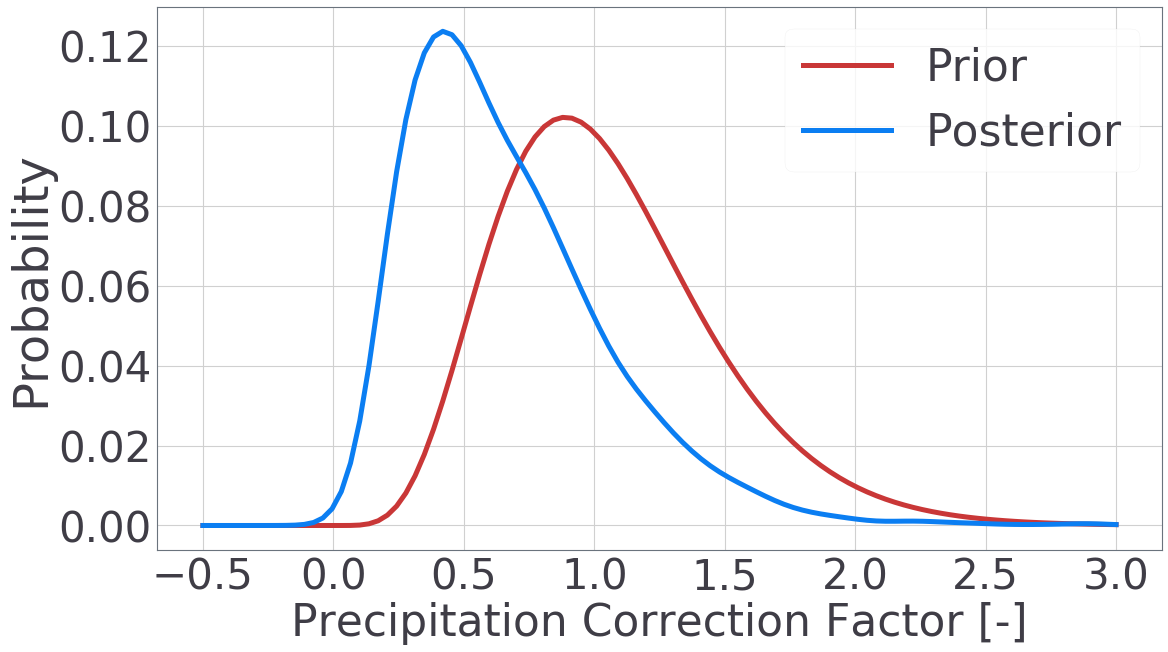

../probability_plots/10075precfactor.png


/home/tushar/anaconda3/envs/pymc/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


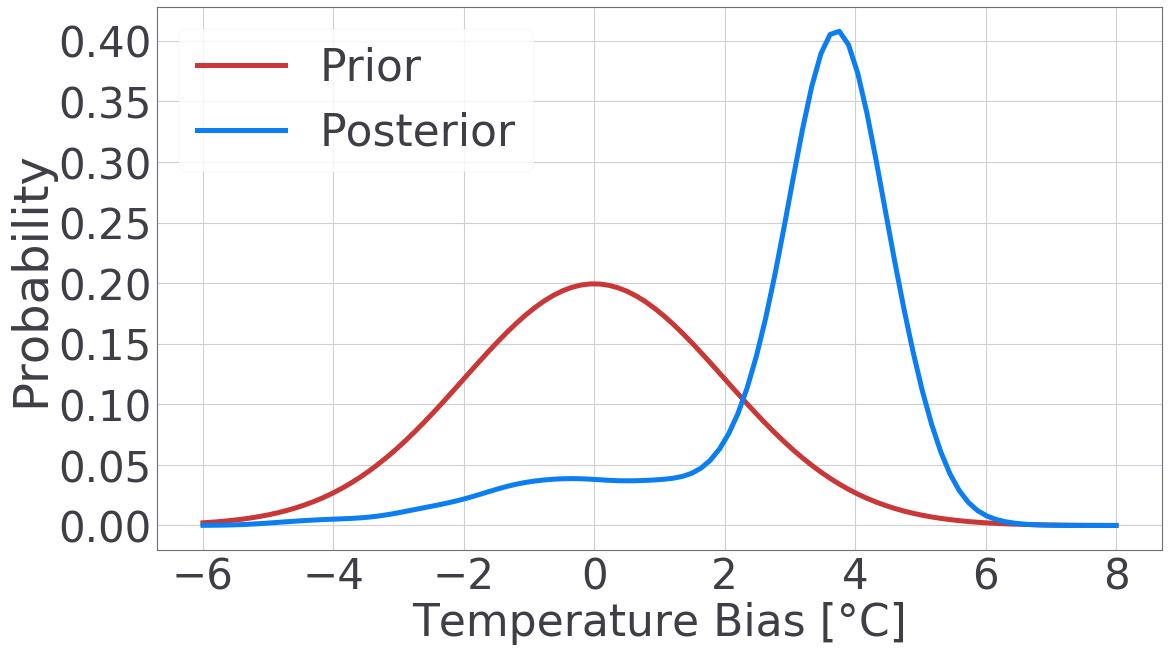

../probability_plots/10079tempchange.png


/home/tushar/anaconda3/envs/pymc/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


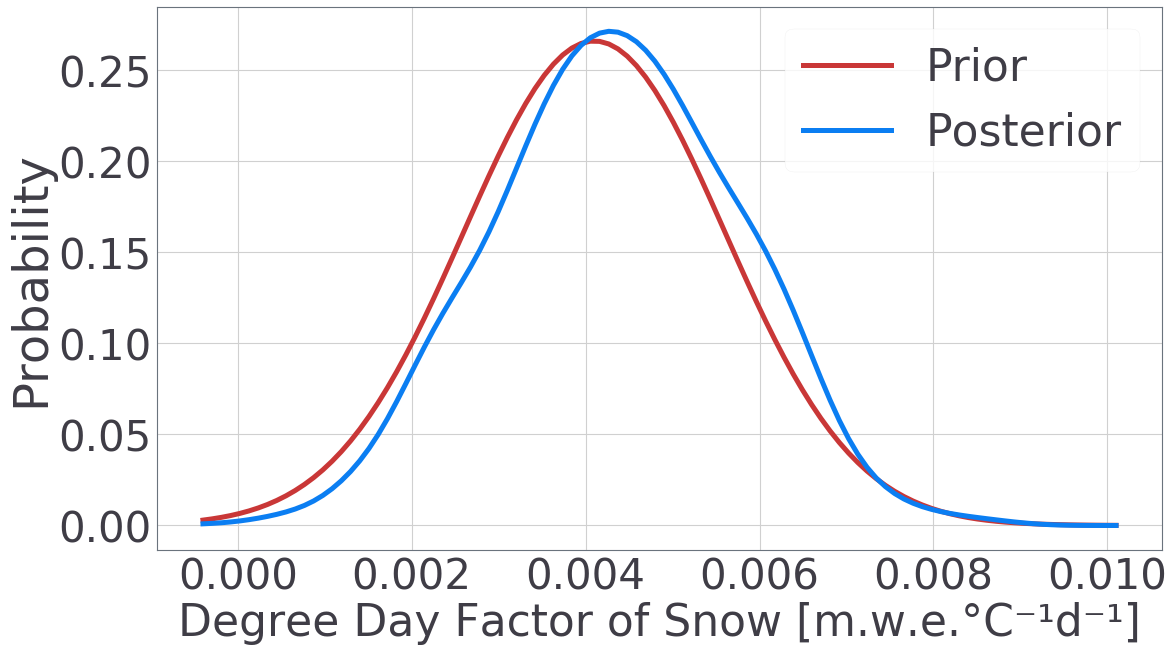

../probability_plots/10079ddfsnow.png


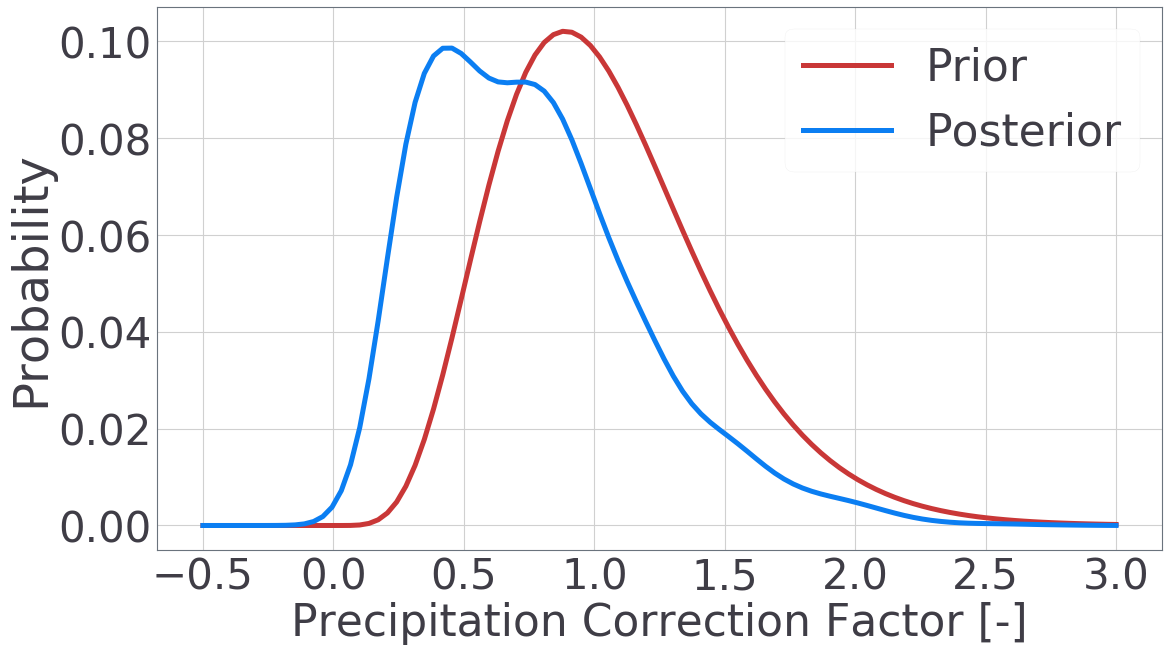

../probability_plots/10079precfactor.png


/home/tushar/anaconda3/envs/pymc/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


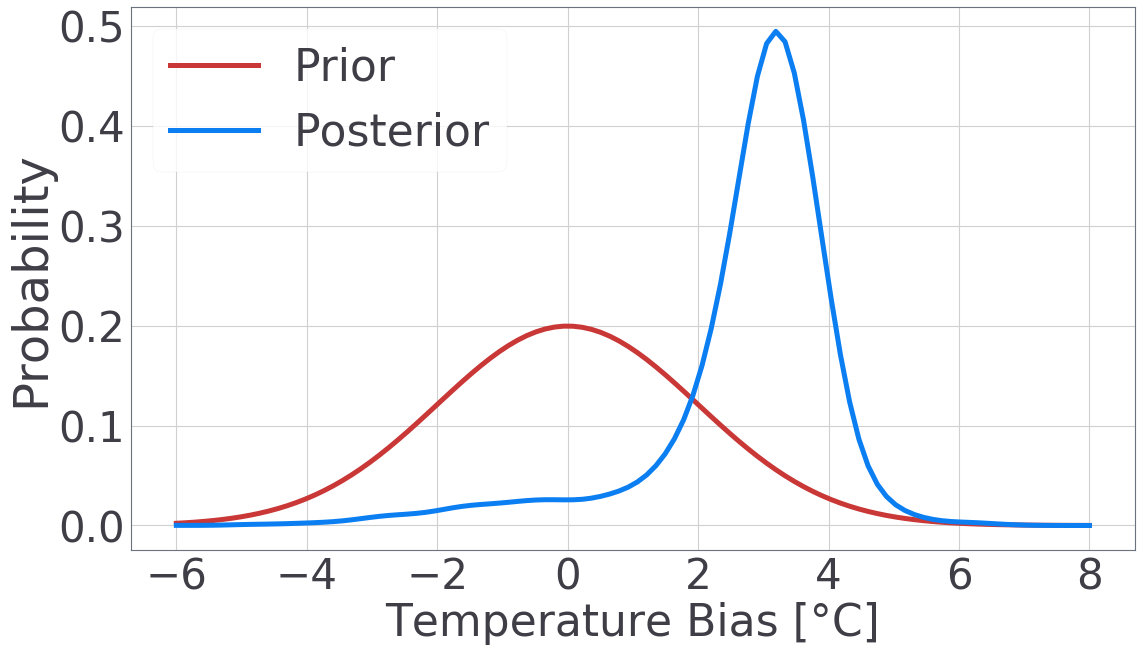

../probability_plots/10059tempchange.png


/home/tushar/anaconda3/envs/pymc/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


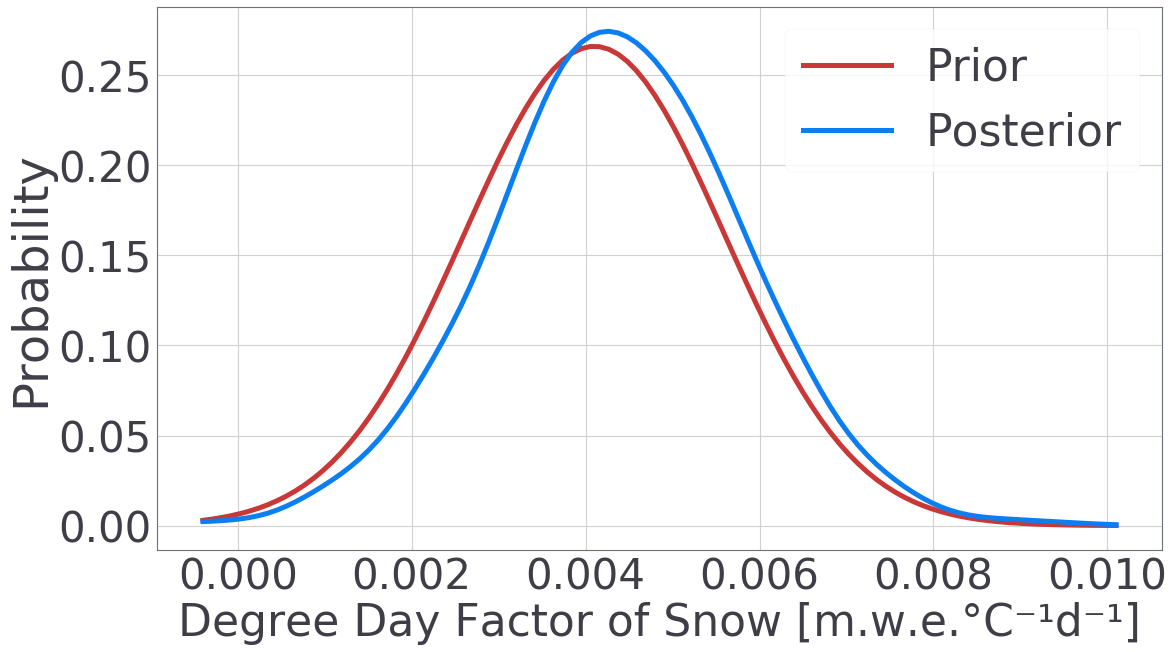

../probability_plots/10059ddfsnow.png


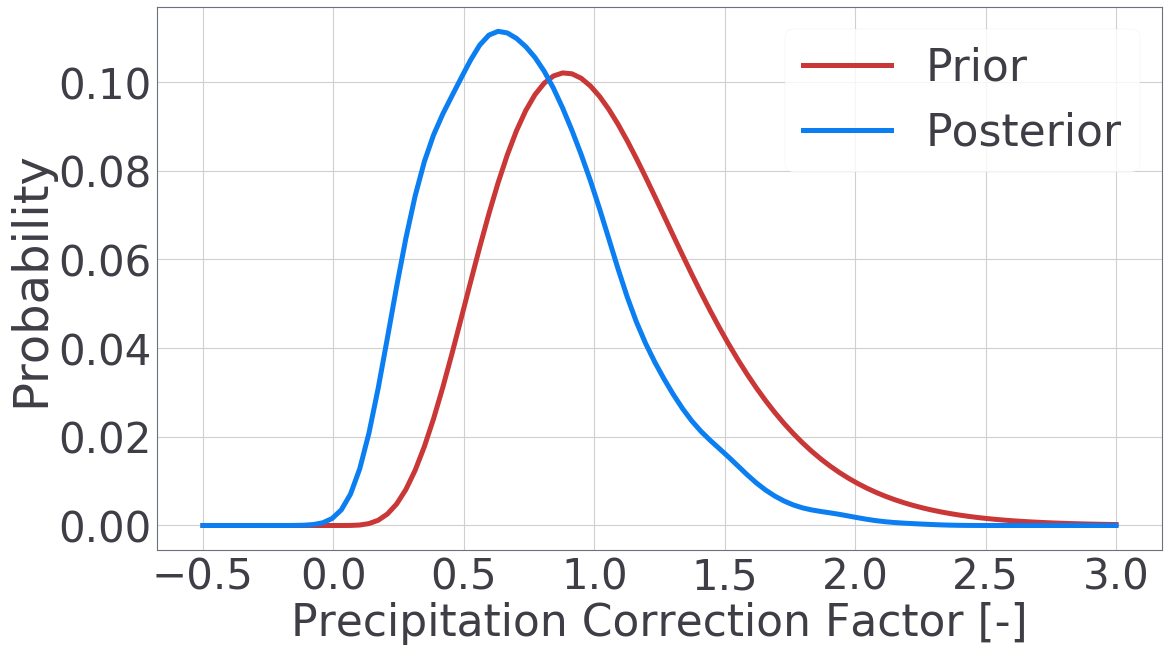

../probability_plots/10059precfactor.png


/home/tushar/anaconda3/envs/pymc/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


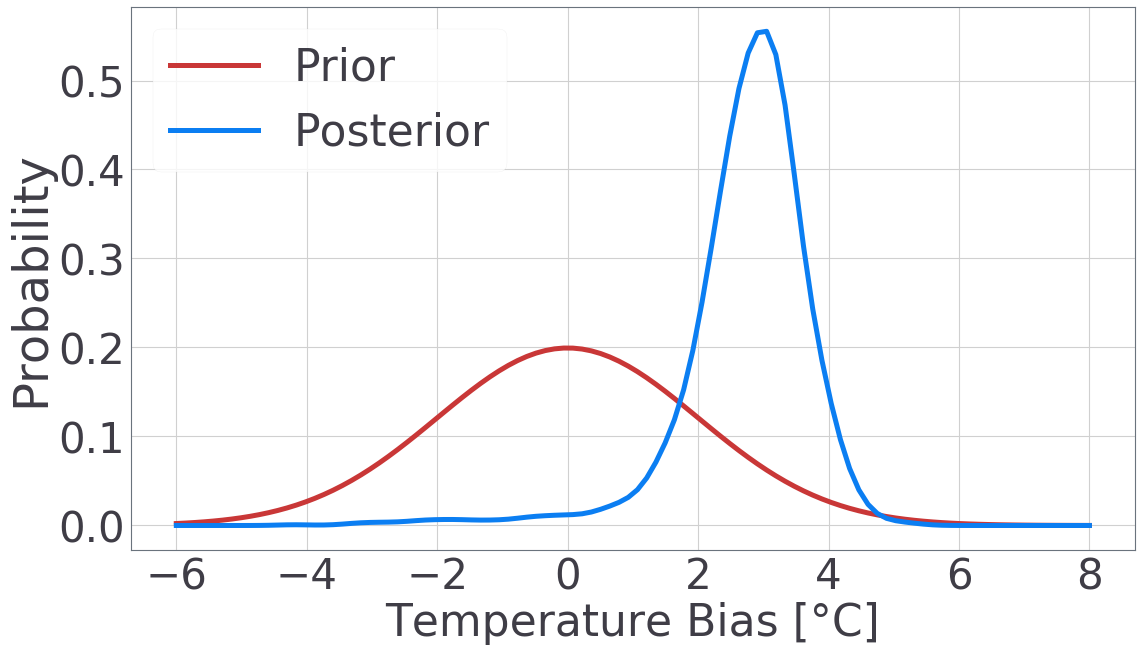

../probability_plots/10060tempchange.png


/home/tushar/anaconda3/envs/pymc/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


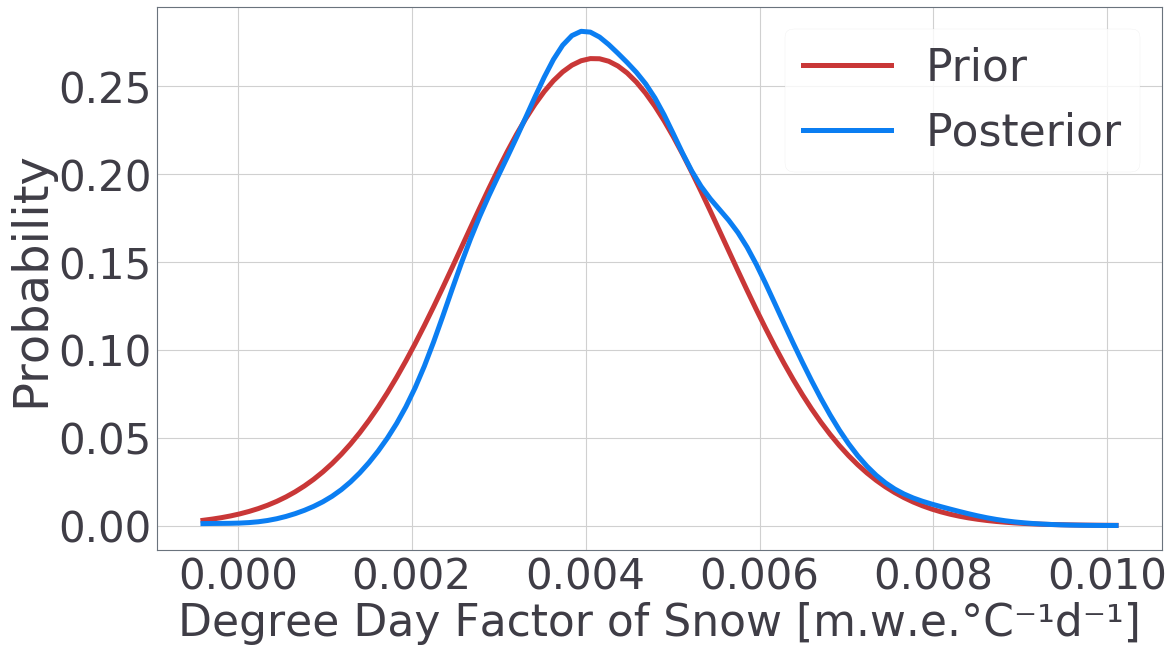

../probability_plots/10060ddfsnow.png


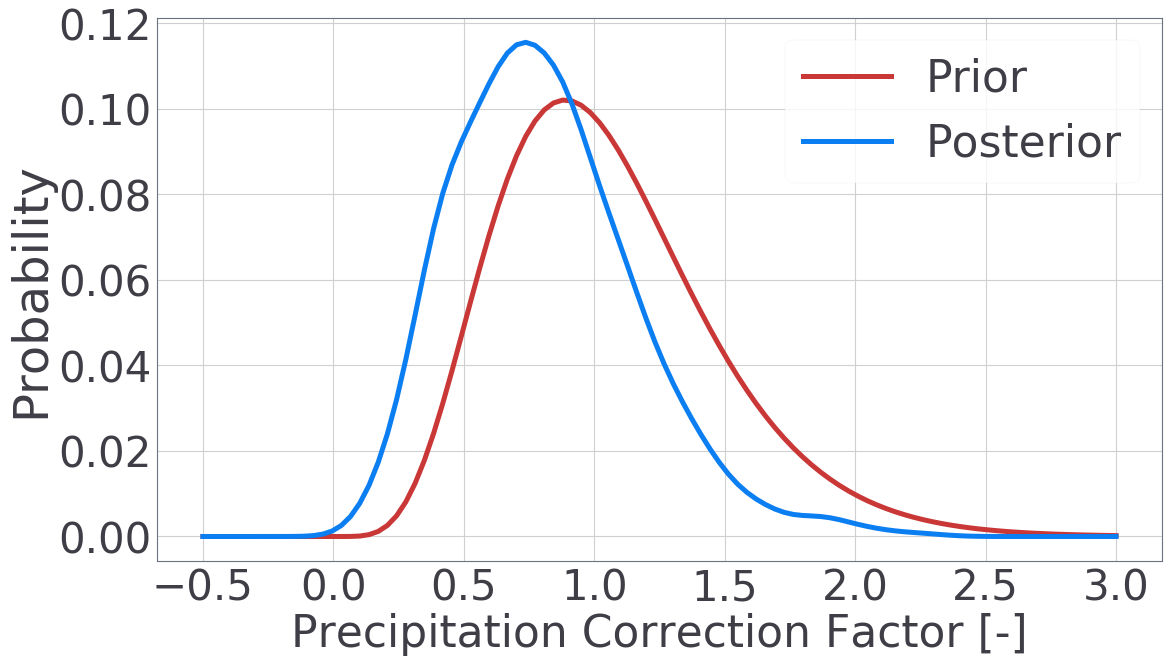

../probability_plots/10060precfactor.png


In [46]:
nums = ['10075', '10079', '10059', '10060']
params = {'tempchange':'Temperature Bias',
          'ddfsnow': 'Degree Day Factor of Snow',
          'precfactor': 'Precipitation Correction Factor'}
colors = [ '#C93737', '#0B7EF2', '#4C0099', '#CC6600']

for num in nums:

    i = 0

    for key, value in params.items():

        fig = plt.figure()

        data = traces[(num, '10000')].trace(key)[:]

        if key == 'tempchange':

            # plot the ideal pdf function
            mu = 0
            sigma = 2
            x = np.linspace(mu - 3*sigma, mu + 4*sigma, 100)
            plt.plot(x,mlab.normpdf(x, mu, sigma), color=colors[0], label = 'Prior', linewidth=5)


            # plot the actual density distribution
            density = gaussian_kde(data)
            density.covariance_factor = lambda : .25
            density._compute_covariance()
            plt.plot(x,density(x), label = 'Posterior', color=colors[1], linewidth=5)
            plt.legend(loc='best', fontsize=44)
            plt.xlabel(value + ' [' + f'\N{DEGREE SIGN}' + 'C]', fontsize = 44)


        elif key == 'ddfsnow':
            # plot the ideal pdf function
            mu = 0.0041
            sigma = 0.0015
            x = np.linspace(mu - 3*sigma, mu + 4*sigma, 100)
            plt.plot(x, mlab.normpdf(x, mu, sigma) /1000, color=colors[0], label = 'Prior', linewidth=5)

            # plot the actual density distribution
            density = gaussian_kde(data)
            density.covariance_factor = lambda : .25
            density._compute_covariance()
            plt.plot(x, density(x) / 1000, label = 'Posterior', linewidth=5, color=colors[1])
            plt.legend(loc='upper right', fontsize=44)
            plt.xlabel(value + ' [m.w.e.' + f'\N{DEGREE SIGN}' + 'C\u207B\u00b9' + 'd\u207b\u00b9]', fontsize = 44)

        elif key == 'precfactor':
            x = np.linspace (-0.5, 3.0, 100) 
            y = stats.gamma.pdf(x, a= 6.33, scale=(1/6)) #a is alpha, loc is beta???
            plt.plot(x, y /10, linewidth =5, label='Prior', color=colors[0])

            # plot the actual density distribution
            density = gaussian_kde(data)
            density.covariance_factor = lambda : .25
            density._compute_covariance()
            plt.plot(x, density(x)/10, label = 'Posterior', linewidth=5, color=colors[1])
            plt.legend(loc='best', fontsize=44)
            plt.xlabel(value + ' [-]', fontsize = 44)
            
        # niceties
        #plt.legend(loc='best', fontsize=36)

        #plt.title('RGI #15.' + num + ' ' + value + ' Prior vs Posterior Probability Distribution', fontsize = 3, y=1.05)
        #plt.title(value, fontsize = 42, y=1.025)
        plt.ylabel('Probability', fontsize =48)
        #plt.xlabel(value + ' [m.w.e.' + f'\N{DEGREE SIGN}' + 'C\u207B\u00b9' + 'd\u207b\u00b9]', fontsize = 40)

        plt.xticks(fontsize=42)
        plt.yticks(fontsize=42)

        plt.show()
        
        print('../probability_plots/' + num + key + '.png')

        #fig.savefig('../probability_plots/' + num + key + '.png')

        i = i+1
